# Dollar Cost Averaging (DCA)

DCA is a simple yet effective strategy that involves investing a fixed amount of money at regular intervals, regardless of the asset's current price. [Read More](https://hulela.co.za/trading-strategies-dollar-cost-averaging-dca-e54f5b42814f)

## Import Libraries

In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
from tabulate import tabulate

## Fetch Historical Stock Data

### Define Stock, Start Date and End Date

In [46]:
# Define the stock symbol and the date range for our data
stock_symbol = 'TSLA'
start_date = '2024-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')  # Sets end date to today's date
print(f"Dollar Cost Averaging for: {stock_symbol}\nStart Date: {start_date}\nEnd Date: {end_date}")

Dollar Cost Averaging for: TSLA
Start Date: 2024-01-01
End Date: 2024-11-12


### Download the date from [yfinance](https://pypi.org/project/yfinance/)

In [47]:
df = yf.download(stock_symbol, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-01-02 00:00:00+00:00,248.419998,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03 00:00:00+00:00,238.449997,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04 00:00:00+00:00,237.929993,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05 00:00:00+00:00,237.490005,237.490005,240.119995,234.899994,236.860001,92379400
2024-01-08 00:00:00+00:00,240.449997,240.449997,241.250000,235.300003,236.139999,85166600


### Preprocess the data

In [48]:
# Select the desired columns (first level of MultiIndex)
df.columns = df.columns.get_level_values(0)

# Keep only the columns you are interested in
df = df[['Open', 'Close', 'Volume', 'Low', 'High']]

# If the index already contains the dates, rename the index
df.index.name = 'Date'  # Ensure the index is named "Date"
    
# Resetting the index if necessary
df.reset_index(inplace=True)

# Ensure that the index is of type datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index again (in case it's reset)
df.set_index('Date', inplace=True)

## Simulate Dollar-Cost Averaging

### Define the Fee calculation function

In [49]:
# Define the fee calculation function
def calculate_fee(amount: float) -> float:
    """Calculate the brokerage fee based on transaction amount."""
    fee = amount * 0.0025  # 0.25% of the transaction
    return max(fee, 0.01)   # Minimum fee of $0.01

In [50]:
# Set investment amount and frequency
investment_amount = 100  # Fixed amount invested each period
df['Month'] = df.index.to_period('M')  # Convert date to monthly period for DCA

# Filter for monthly closing prices
monthly_data = df.groupby('Month').last()  # Taking the last closing price of each month

# Initialize variables to track investments
total_investment = 0
total_shares = 0

# Lists to store results for displaying in a table
investment_results = []

# Loop through each month and simulate DCA
for index, row in monthly_data.iterrows():
    # Calculate the fee for this transaction
    fee = calculate_fee(investment_amount)
    
    # Subtract fee from the investment amount
    net_investment = investment_amount - fee
    
    # Calculate the number of shares bought this month with the net investment
    shares_bought = net_investment / row['Close']
    
    # Update total shares and total investment
    total_shares += shares_bought
    total_investment += net_investment
    
    # Calculate the value of holdings each month
    current_value = total_shares * row['Close']
    
    # Calculate the average cost per share
    average_cost_per_share = total_investment / total_shares
    
    # Store the results in a list for tabulation
    investment_results.append([index, row['Close'], net_investment, fee, total_investment, total_shares, current_value, average_cost_per_share])

# Define table headers
headers = ['Month', 'Closing Price', 'Net Investment ($)', 'Fee ($)', 'Total Investment ($)', 'Total Shares', 'Portfolio Value ($)', 'Average Cost per Share ($)']

# Display the results in a table
print(tabulate(investment_results, headers=headers, tablefmt='pretty'))


+---------+--------------------+--------------------+---------+----------------------+--------------------+---------------------+----------------------------+
|  Month  |   Closing Price    | Net Investment ($) | Fee ($) | Total Investment ($) |    Total Shares    | Portfolio Value ($) | Average Cost per Share ($) |
+---------+--------------------+--------------------+---------+----------------------+--------------------+---------------------+----------------------------+
| 2024-01 | 187.2899932861328  |       99.75        |  0.25   |        99.75         | 0.5325965271812823 |        99.75        |     187.2899932861328      |
| 2024-02 | 201.8800048828125  |       99.75        |  0.25   |        199.5         | 1.0267019243844524 | 207.27058950792625  |     194.31150878538384     |
| 2024-03 | 175.7899932861328  |       99.75        |  0.25   |        299.25        | 1.594140366899421  |  280.2339243944025  |     187.7187267906883      |
| 2024-04 | 183.27999877929688 |       99.75  

C:\Users\Brian\AppData\Local\Temp\ipykernel_13032\2418273942.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df.index.to_period('M')  # Convert date to monthly period for DCA


## Visualization

### Portfolio Value Over Time

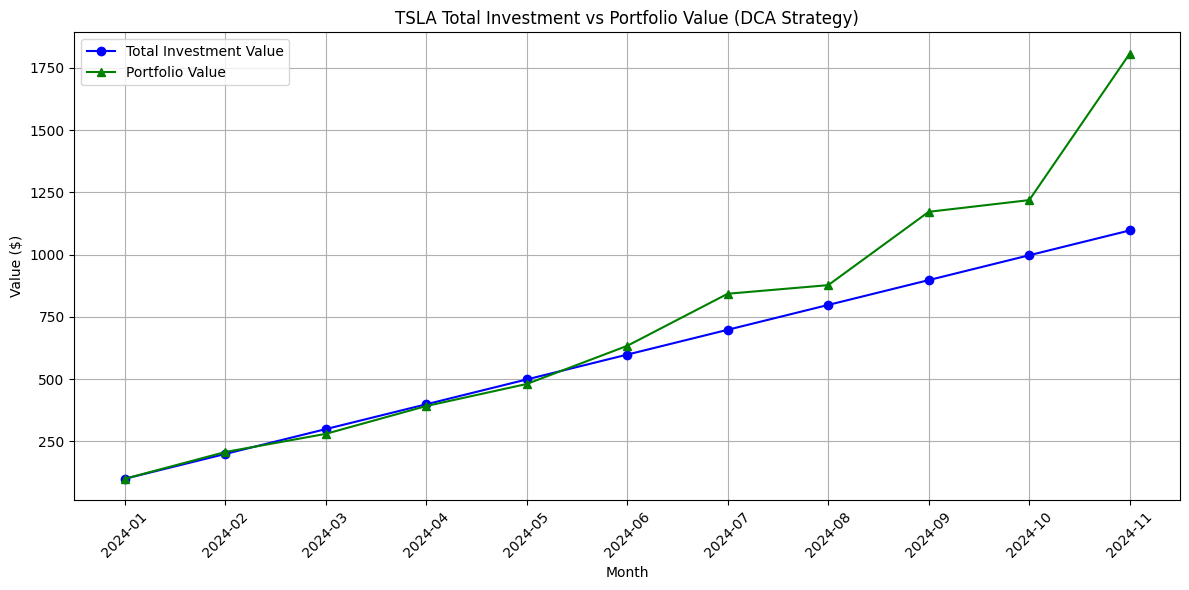

In [55]:
# Initialize lists to store Total Investment and Portfolio Value for plotting
total_investment_values = []
portfolio_values = []

# Convert the month values to string for plotting
months = [str(result[0]) for result in investment_results]  # Convert Period to string format

# Loop through the investment results and collect data for plotting
for result in investment_results:
    total_investment_values.append(result[4])  # Total Investment ($)
    portfolio_values.append(result[6])  # Portfolio Value ($)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the Total Investment Value
plt.plot(months, total_investment_values, label='Total Investment Value', color='blue', linestyle='-', marker='o')

# Plot the Portfolio Value
plt.plot(months, portfolio_values, label='Portfolio Value', color='green', linestyle='-', marker='^')

# Customize the plot
plt.title(f'{stock_symbol} Total Investment vs Portfolio Value (DCA Strategy)')
plt.xlabel('Month')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.savefig(f'{stock_symbol}_growth_plot.png', dpi=300)
plt.show()


### Visualize DCA Buys Over Time

C:\Users\Brian\AppData\Local\Temp\ipykernel_13032\2142682298.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(buy_dates[i], buy_prices[i] + 5, f'${txt:.2f}', color='lime', ha='center', va='bottom', fontsize=12)


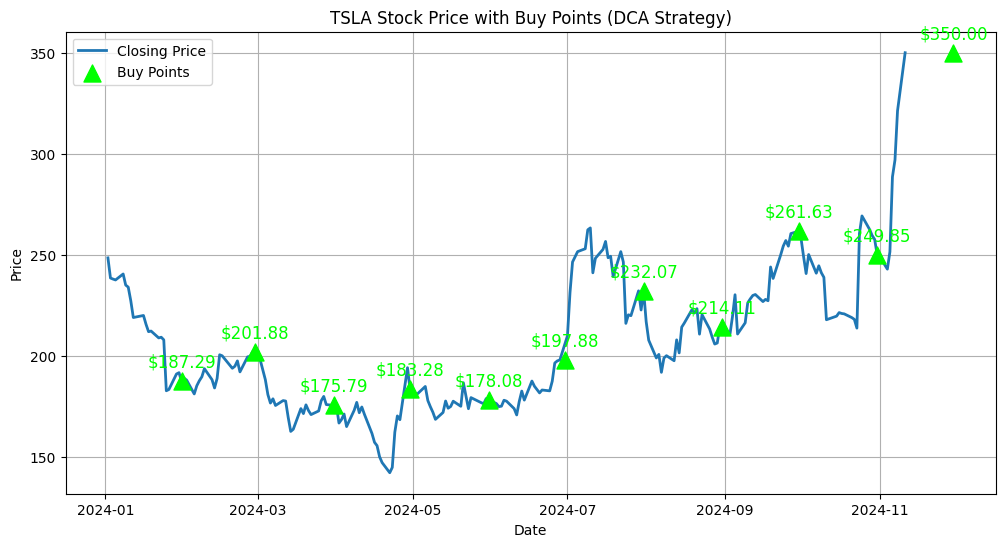

In [ ]:
# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Closing Price', linewidth=2)

# Plot the buy points with bigger, neon green triangles
# Loop through the monthly data and add a neon green triangle at each buy point
buy_dates = monthly_data.index
buy_prices = monthly_data['Close']

# Scatter plot for buy points with larger size and neon green color
plt.scatter(buy_dates, buy_prices, marker='^', color='lime', s=150, label='Buy Points', zorder=5)

# Add text labels showing the price at each buy point
for i, txt in enumerate(buy_prices):
    # Add text labels with a vertical offset to move it slightly higher
    plt.text(buy_dates[i], buy_prices[i] + 5, f'${txt:.2f}', color='lime', ha='center', va='bottom', fontsize=12)

# Customize plot
plt.title(f'{stock_symbol} Stock Price with Buy Points (DCA Strategy)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()

# Save the plot in 300 dpi
plt.savefig(f'{stock_symbol}_dca_plot.png', dpi=300)

# Show the plot
plt.show()
